In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('diabetic_retinopathy.csv')
X = dataset.drop('Class', axis = 1)
y = dataset['Class']

In [3]:
dataset.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
Class    0
dtype: int64

In [4]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
from sklearn.linear_model import LogisticRegression

LogisticRegression(penalty='l1')
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train, y_train)

print('Training Accuracy: ', lr.score(X_train, y_train))
print('Test Accuracy: ', lr.score(X_test, y_test))

Training Accuracy:  0.763812154696
Test Accuracy:  0.717041800643


In [6]:
y_pred_lr = lr.predict(X_test)

In [7]:
# Using testing data

test_data = pd.read_csv('test_data.csv')
# test_data.head()
# test_data.shape

In [8]:
test_2 = test_data.drop('Class', axis=1)

In [9]:
prediksi = lr.predict(test_2)

In [10]:
print(prediksi)

[1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0
 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1
 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0
 0 0 1 1 0]


In [11]:
aktual = test_data['Class']

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  
print(confusion_matrix(aktual, prediksi))  
print(classification_report(aktual, prediksi))
print('Accuracy: %.3f' % accuracy_score(aktual, prediksi))

[[49 11]
 [16 40]]
             precision    recall  f1-score   support

          0       0.75      0.82      0.78        60
          1       0.78      0.71      0.75        56

avg / total       0.77      0.77      0.77       116

Accuracy: 0.767


In [13]:
#Standardization using StandardScaler

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train_ss = standard_scaler.transform(X_train)
X_test_ss = standard_scaler.transform(X_test)


In [14]:
lr_ss = LogisticRegression(penalty='l1', C=0.1)
lr_ss.fit(X_train_ss, y_train)

print('Training Accuracy: ', lr_ss.score(X_train_ss, y_train))
print('Test Accuracy: ', lr_ss.score(X_test_ss, y_test))

Training Accuracy:  0.689226519337
Test Accuracy:  0.64308681672


In [15]:
y_pred_lr_ss = lr_ss.predict(X_test_ss)
print('Accuracy with StandardScaler: %.3f' % accuracy_score(y_test, y_pred_lr_ss),'%')

Accuracy with StandardScaler: 0.643 %


In [16]:
test2_ss = standard_scaler.transform(test_2)

In [17]:
prediksi_ss = lr_ss.predict(test2_ss)

print(confusion_matrix(aktual, prediksi_ss))  
print(classification_report(aktual, prediksi_ss))
print('Accuracy prediksi ss: %.3f' % accuracy_score(aktual, prediksi_ss))

[[46 14]
 [18 38]]
             precision    recall  f1-score   support

          0       0.72      0.77      0.74        60
          1       0.73      0.68      0.70        56

avg / total       0.72      0.72      0.72       116

Accuracy prediksi ss: 0.724


In [18]:
print("Perbandingan StandarScaler dengan tidak")
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_lr),'%')
print('Accuracy dengan StandarScaler: %.3f' % accuracy_score(y_test, y_pred_lr_ss),'%')

Perbandingan StandarScaler dengan tidak
Accuracy: 0.717 %
Accuracy dengan StandarScaler: 0.643 %


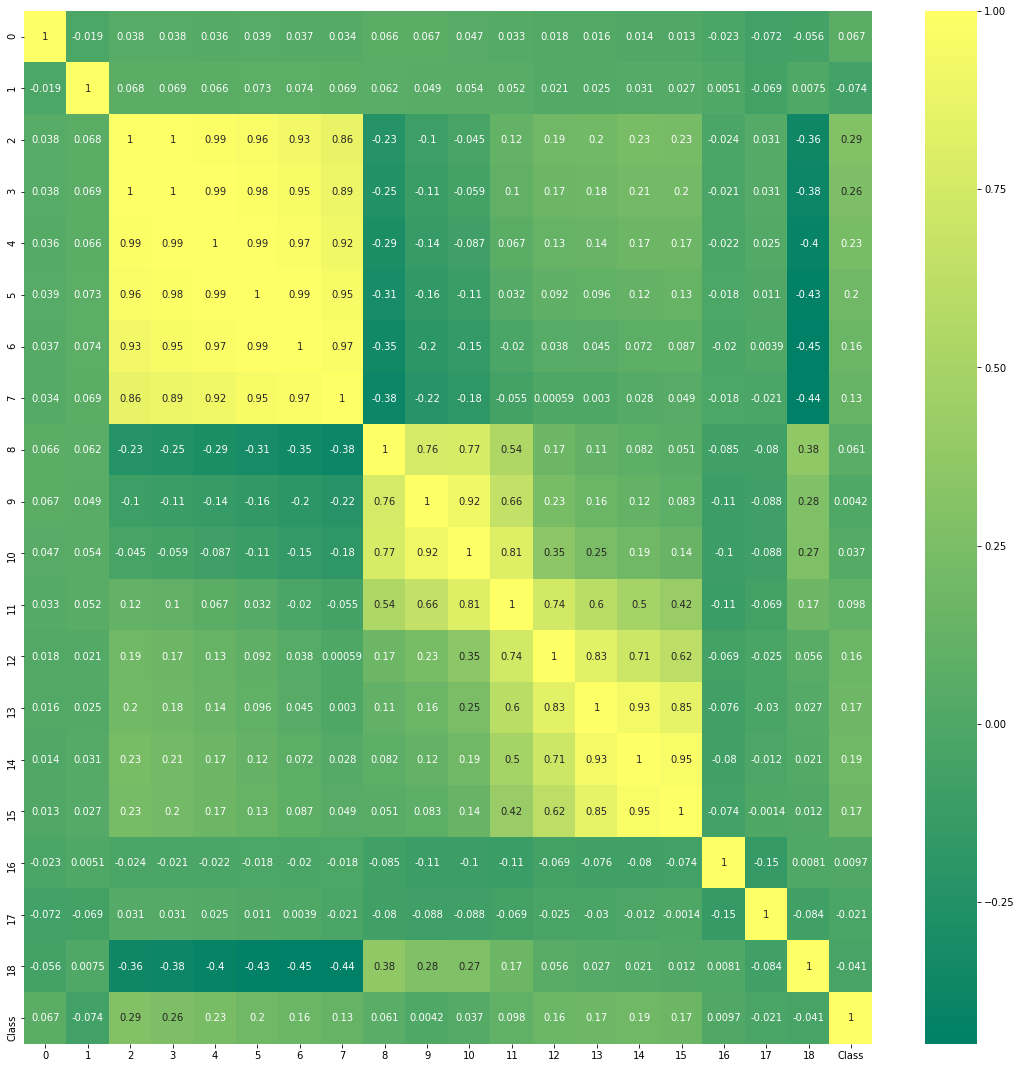

In [19]:
# Feature Correlation

import seaborn as sns
import matplotlib.pyplot as plt

corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(19,19))

g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="summer")
plt.show()

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=19)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(19,'Score'))

   Feature        Score
2        2  1489.147916
3        3  1136.769674
4        4   830.486398
5        5   554.310327
6        6   365.660141
8        8   206.521262
7        7   194.792951
12      12   144.962593
13      13    85.875880
11      11    58.594940
14      14    55.006154
15      15    24.448562
10      10    20.458623
18      18     1.145280
1        1     0.459603
9        9     0.358191
0        0     0.017944
17      17     0.001391
16      16     0.000142


In [21]:
# Feature Selection
features = np.full((corrmat.shape[0],), True, dtype=bool)
for i in range(corrmat.shape[0]):
    for j in range(i+1, corrmat.shape[0]):
        if corrmat.iloc[i,j] >= 0.9:
            if features[j]:
                features[j] = False

selected_features = dataset.columns[features]

new_dataset_fs = dataset[selected_features]

In [22]:
new_dataset_fs.columns

Index(['0', '1', '2', '8', '9', '11', '12', '13', '16', '17', '18', 'Class'], dtype='object')

In [23]:
result = pd.DataFrame()
result['Class'] = new_dataset_fs['Class']
result.columns

Index(['Class'], dtype='object')

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


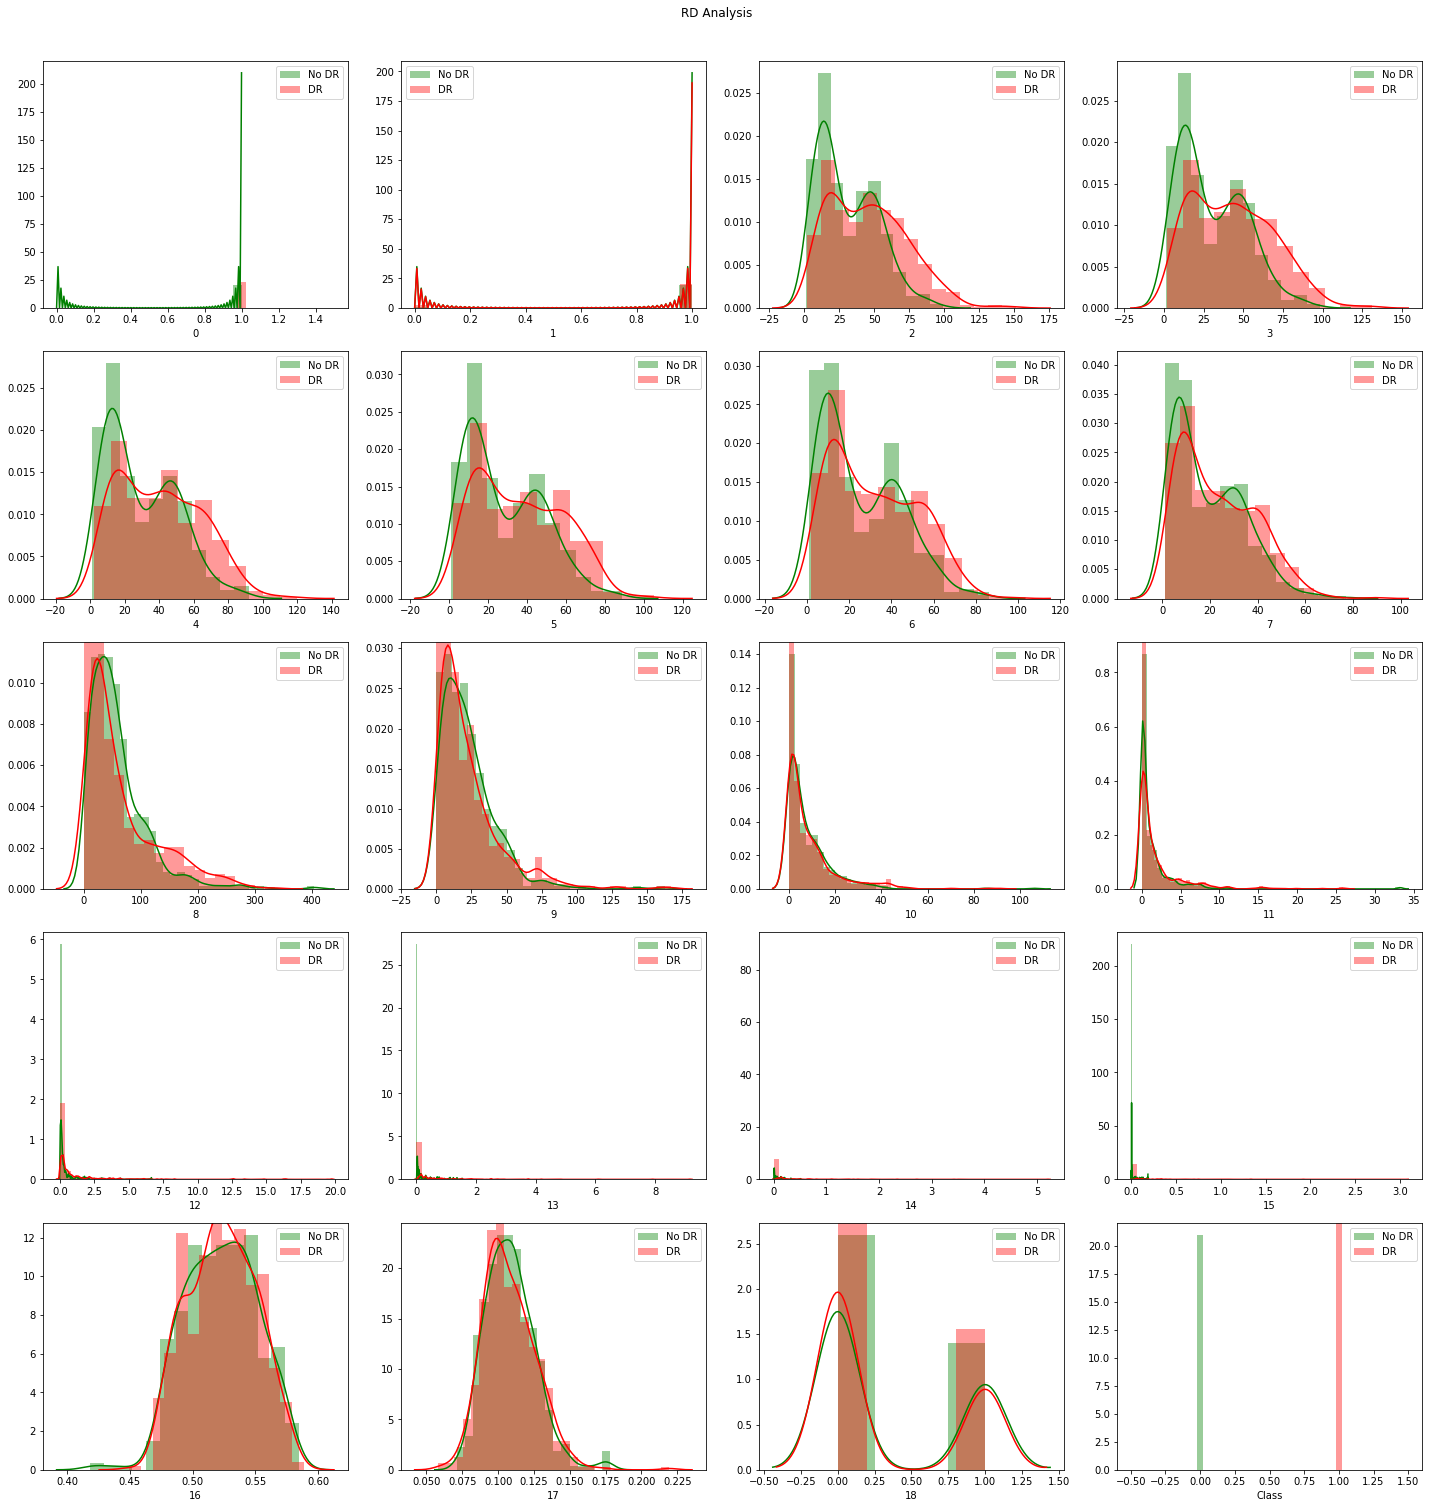

In [24]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in dataset.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(dataset[i][result['Class']==0], color='g', label = 'No DR')
    sns.distplot(dataset[i][result['Class']==1], color='r', label = 'DR')
    plt.legend(loc='best')
fig.suptitle('RD Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [25]:
new_dataset_fs2 = new_dataset_fs.drop('Class', axis=1)
new_dataset_fs2.columns

Index(['0', '1', '2', '8', '9', '11', '12', '13', '16', '17', '18'], dtype='object')

In [26]:
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(new_dataset_fs2, result, test_size = 0.2)

In [27]:
lr_fs = LogisticRegression(penalty='l1', C=0.05)
lr_fs.fit(X_train_fs, y_train_fs)

print('Training Accuracy after feature selection: ', lr_fs.score(X_train_fs, y_train_fs))
print('Test Accuracy after feature selection: ', lr_fs.score(X_test_fs, y_test_fs))

Training Accuracy after feature selection:  0.609903381643
Test Accuracy after feature selection:  0.676328502415


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
test_data_fs = test_data[new_dataset_fs2.columns]

In [29]:
aktual_fs = test_data['Class']

In [30]:
test_data_fs.columns

Index(['0', '1', '2', '8', '9', '11', '12', '13', '16', '17', '18'], dtype='object')

In [31]:
prediksi_fs = lr_fs.predict(test_data_fs)
print(prediksi_fs)

[1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0
 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0
 1 1 1 1 0]


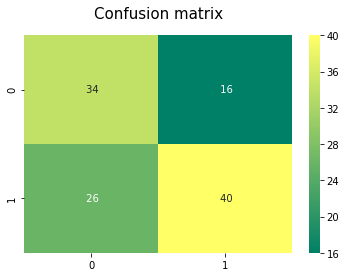

             precision    recall  f1-score   support

          0       0.57      0.68      0.62        50
          1       0.71      0.61      0.66        66

avg / total       0.65      0.64      0.64       116

Accuracy: 0.638 %


In [32]:
sns.heatmap(confusion_matrix(prediksi_fs, aktual_fs),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion matrix', y=1.05, size=15)
plt.show()
# print(confusion_matrix(pred, aktual))  
print(classification_report(prediksi_fs, aktual_fs))
print('Accuracy: %.3f' % accuracy_score(prediksi_fs, aktual_fs), '%')

In [33]:
X_new_fs2 = X.drop(['1','17','18'], axis=1)

In [34]:
X_new_fs2.columns

Index(['0', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16'],
      dtype='object')

In [35]:
X_train_fs2, X_test_fs2, y_train_fs2, y_test_fs2 = train_test_split(X_new_fs2, y, test_size = 0.25)

In [36]:
lr_fs2 = LogisticRegression(penalty='l1', C=3)
lr_fs2.fit(X_train_fs2, y_train_fs2)

print('Training Accuracy after feature selection: ', lr_fs2.score(X_train_fs2, y_train_fs2))
print('Test Accuracy after feature selection: ', lr_fs2.score(X_test_fs2, y_test_fs2))

Training Accuracy after feature selection:  0.755154639175
Test Accuracy after feature selection:  0.749034749035


In [37]:
test_data_fs2 = test_data[X_new_fs2.columns]

In [38]:
prediksi_fs2 = lr_fs2.predict(test_data_fs2)
print(prediksi_fs2)

[1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0
 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1
 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 0]


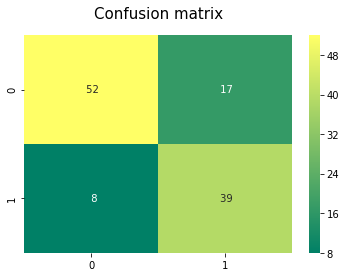

             precision    recall  f1-score   support

          0       0.87      0.75      0.81        69
          1       0.70      0.83      0.76        47

avg / total       0.80      0.78      0.79       116

Accuracy: 0.784 %


In [39]:
sns.heatmap(confusion_matrix(prediksi_fs2, aktual_fs),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion matrix', y=1.05, size=15)
plt.show()
# print(confusion_matrix(pred, aktual))  
print(classification_report(prediksi_fs2, aktual_fs))
print('Accuracy: %.3f' % accuracy_score(prediksi_fs2, aktual_fs), '%')

In [40]:
X_new_fs3 = X.drop(['16','17','18', '0', '1', '9'], axis=1)

In [41]:
X_train_fs3, X_test_fs3, y_train_fs3, y_test_fs3 = train_test_split(X_new_fs3, y, test_size = 0.25)

In [42]:
lr_fs3 = LogisticRegression(penalty='l1', C=0.05)
lr_fs3.fit(X_train_fs3, y_train_fs3)

print('Training Accuracy after feature selection: ', lr_fs3.score(X_train_fs3, y_train_fs3))
print('Test Accuracy after feature selection: ', lr_fs3.score(X_test_fs3, y_test_fs3))

Training Accuracy after feature selection:  0.748711340206
Test Accuracy after feature selection:  0.752895752896


In [43]:
test_data_fs3 = test_data[X_new_fs3.columns]

In [44]:
prediksi_fs3 = lr_fs3.predict(test_data_fs3)

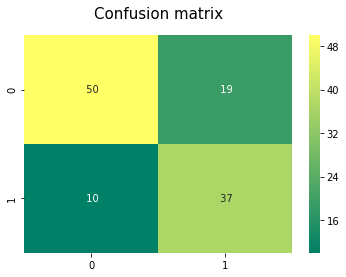

             precision    recall  f1-score   support

          0       0.83      0.72      0.78        69
          1       0.66      0.79      0.72        47

avg / total       0.76      0.75      0.75       116

Accuracy: 0.750 %


In [45]:
sns.heatmap(confusion_matrix(prediksi_fs3, aktual_fs),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion matrix', y=1.05, size=15)
plt.show()
# print(confusion_matrix(pred, aktual))  
print(classification_report(prediksi_fs3, aktual_fs))
print('Accuracy: %.3f' % accuracy_score(prediksi_fs3, aktual_fs), '%')

In [46]:
#Hyper-parameter tuning

parameters = [{
    'C': [0.01, 0.05, 0.1, 0.5, 1],
    'max_iter' : [100, 200, 500, 1000],
    'penalty' : ['l1', 'l2']}
]
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(lr, parameters, cv=5, verbose=0)
clf2 = GridSearchCV(lr_ss, parameters, cv=5, verbose=0)
clf3 = GridSearchCV(lr_fs2, parameters, cv=5, verbose=0)

In [47]:
best_model = clf.fit(X, y)
best_model2 = clf2.fit(X, y)
best_model3 = clf3.fit(X, y)

In [48]:
print(best_model.best_estimator_.get_params())
print(best_model2.best_estimator_.get_params())
print(best_model3.best_estimator_.get_params())

{'C': 0.05, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': 1, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
{'C': 0.05, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': 1, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
{'C': 0.05, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': 1, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [49]:
y_pred_clf = clf.predict(X_test)
y_pred_clf2 = clf2.predict(X_test_ss)
y_pred_clf3 = clf3.predict(X_test)

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_clf),'%')
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_clf2),'%')
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_clf3),'%')


Accuracy: 0.736 %
Accuracy: 0.543 %
Accuracy: 0.736 %


In [50]:
lr_2 = LogisticRegression(penalty='l1', C=0.05, max_iter=100)
lr_2.fit(X_train, y_train)

print('Training Accuracy: ', lr_2.score(X_train, y_train))
print('Test Accuracy: ', lr_2.score(X_test, y_test))

lr_ss_2 = LogisticRegression(penalty='l1', C=0.05, max_iter=100)
lr_ss_2.fit(X_train_ss, y_train)

print('Training Accuracy: ', lr_ss_2.score(X_train_ss, y_train))
print('Test Accuracy: ', lr_ss_2.score(X_test_ss, y_test))

lr_fs2_2 = LogisticRegression(penalty='l1', C=0.05, max_iter=100)
lr_fs2_2.fit(X_train_fs2, y_train_fs2)

print('Training Accuracy after feature selection: ', lr_fs2_2.score(X_train_fs2, y_train_fs2))
print('Test Accuracy after feature selection: ', lr_fs2_2.score(X_test_fs2, y_test_fs2))

Training Accuracy:  0.752762430939
Test Accuracy:  0.745980707395
Training Accuracy:  0.650552486188
Test Accuracy:  0.59807073955
Training Accuracy after feature selection:  0.738402061856
Test Accuracy after feature selection:  0.752895752896


In [51]:
print(confusion_matrix(aktual, lr_2.predict(test_2)))  
print(classification_report(aktual, lr_2.predict(test_2)))
print('Accuracy: %.3f' % accuracy_score(aktual, lr_2.predict(test_2)))

[[47 13]
 [14 42]]
             precision    recall  f1-score   support

          0       0.77      0.78      0.78        60
          1       0.76      0.75      0.76        56

avg / total       0.77      0.77      0.77       116

Accuracy: 0.767


In [52]:
print(confusion_matrix(aktual, lr_ss_2.predict(test2_ss)))  
print(classification_report(aktual, lr_ss_2.predict(test2_ss)))
print('Accuracy prediksi ss: %.3f' % accuracy_score(aktual, lr_ss_2.predict(test2_ss)))

[[42 18]
 [20 36]]
             precision    recall  f1-score   support

          0       0.68      0.70      0.69        60
          1       0.67      0.64      0.65        56

avg / total       0.67      0.67      0.67       116

Accuracy prediksi ss: 0.672


In [53]:
print(confusion_matrix(lr_fs2_2.predict(test_data_fs2), aktual_fs))  
print(classification_report(lr_fs2_2.predict(test_data_fs2), aktual_fs))
print('Accuracy: %.3f' % accuracy_score(lr_fs2_2.predict(test_data_fs2), aktual_fs), '%')

[[46 16]
 [14 40]]
             precision    recall  f1-score   support

          0       0.77      0.74      0.75        62
          1       0.71      0.74      0.73        54

avg / total       0.74      0.74      0.74       116

Accuracy: 0.741 %


In [55]:
import pickle
# Save to file in the current working directory
pkl_filename = "final_model.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(lr, file)

# Load from file
# with open(pkl_filename, 'rb') as file:  
#     ml_model = pickle.load(file)

# Calculate the accuracy score and predict target values
# score = ml_model.score(X_test, y_test)  
# print("Test score: {0:.2f} %".format(100 * score))  
# prediksi_model = ml_model.predict(X_test)  

In [125]:
result_table.to_csv(r'D:\KULIAH\ITS\Semester 6\Analitika Bisnis [AB]\Final Project\hasil_logreg_best.csv')